In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
housing = pd.read_csv("housing-3.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["total_bedrooms"].value_counts()


total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

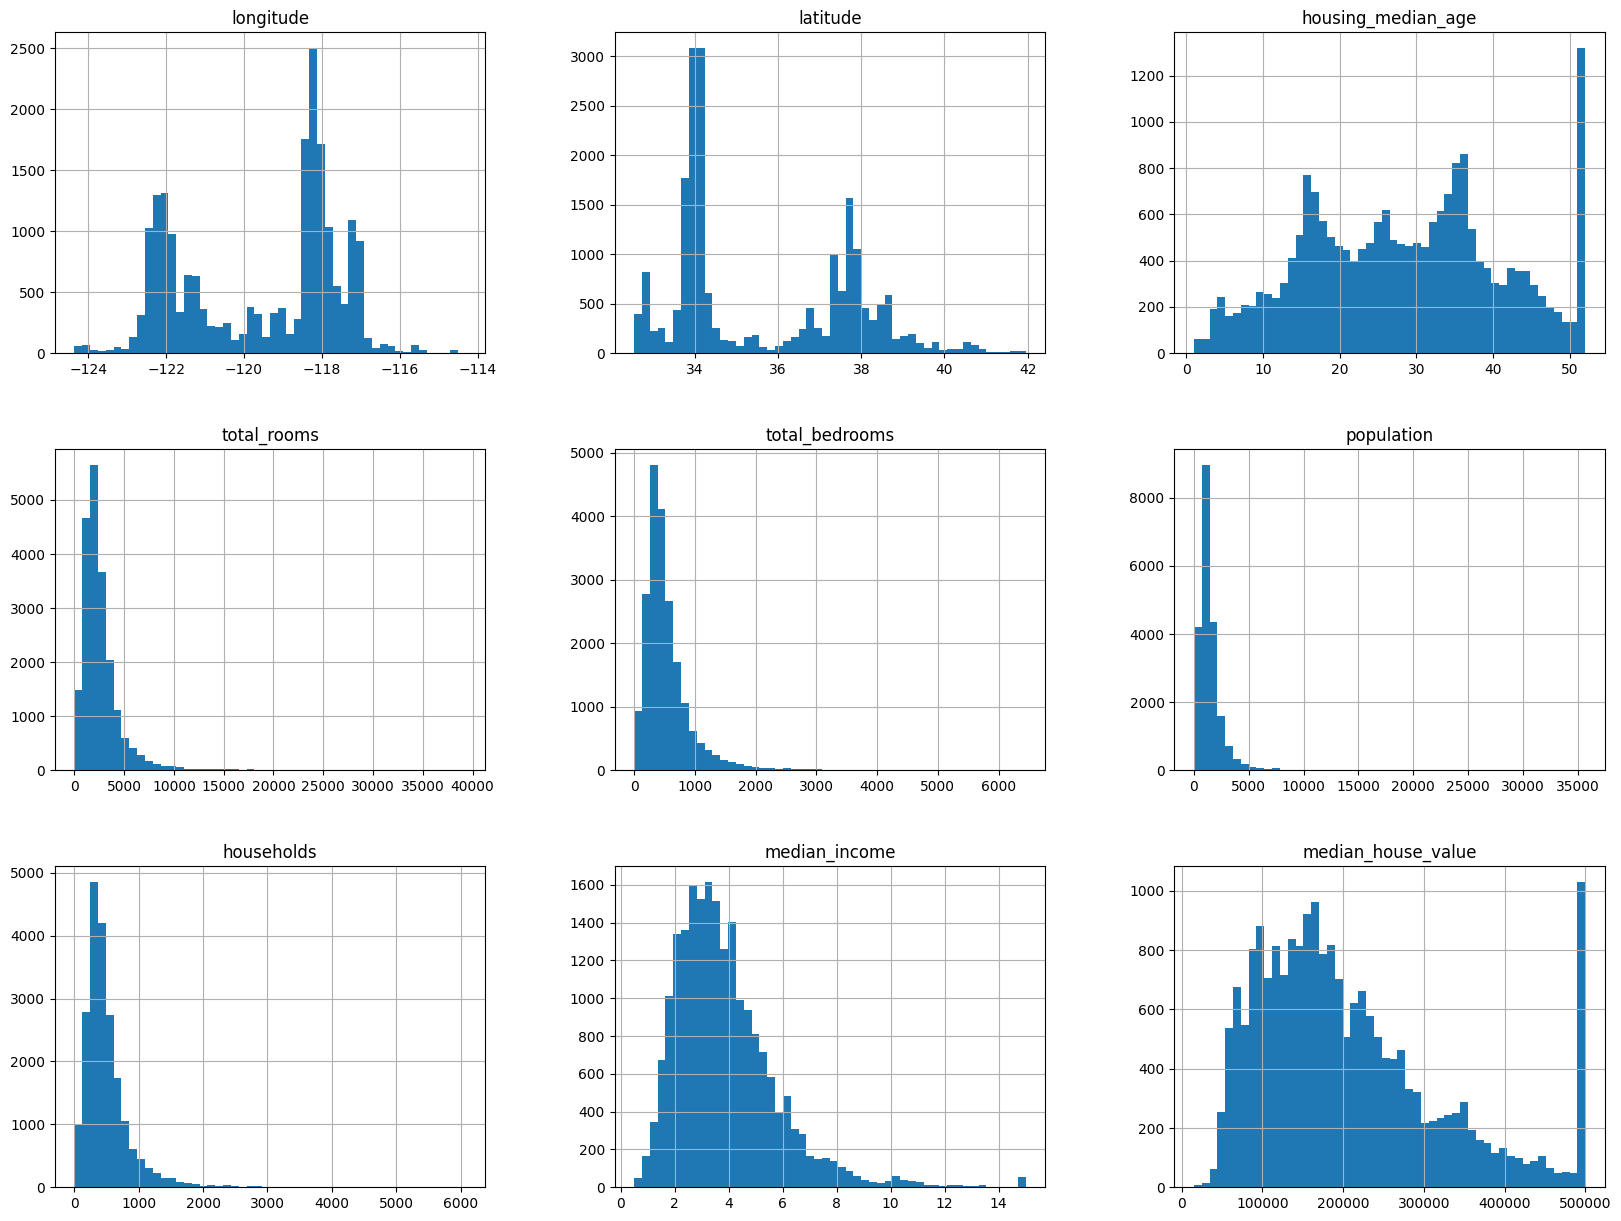

In [11]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()
#bins divide the data in equal intervals/bars show data
#more bins give more details and help to understand data outlier, skewness


In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


In [13]:
#here creating a nre catogeries for median income 

<Axes: >

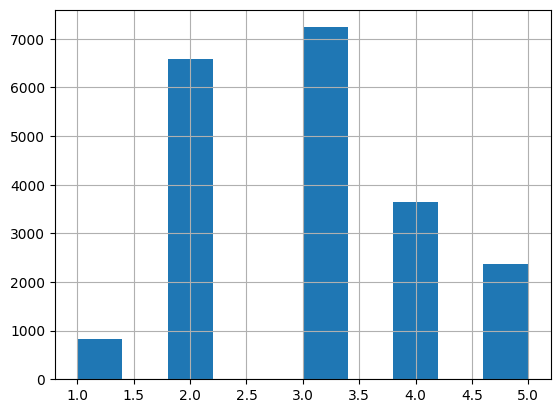

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
                               labels = [1, 2, 3,4, 5])
housing
housing["income_cat"].hist()
# as housing price affect by income very much so it is important freaturs
#so we creat a new features where incoem categoirs scaled so that it doesnt show error

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
#Make data equal while splitting as it helps to focus at the part where the data is very important
#Test it and the train doesn't get biased and it equal proportional over
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set  = housing.loc[test_idx]

In [16]:
print(len((strat_train_set)))
print(len((strat_test_set)))

16512
4128


In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Above whole thing was about the data. How we split that and how we make a new columns and make it generalised way here we use StratifiedShuffleSplit that is used so that data get split in the equal proportion as in both tested in the training set.

In [19]:
#copying data set
housing = strat_train_set.copy()

<h4>time to vislualize dataset</h4>

<Axes: xlabel='longitude', ylabel='latitude'>

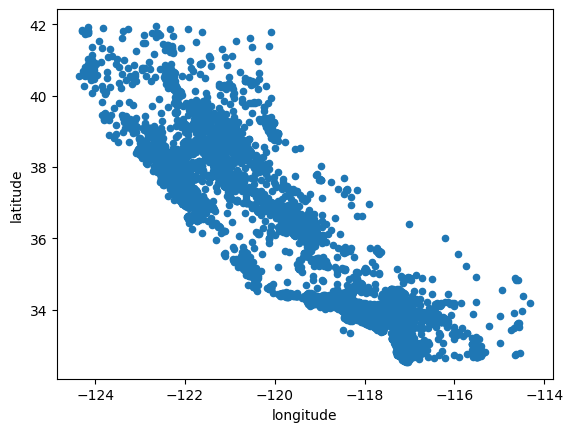

In [21]:
#gettin geograpical intution 
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

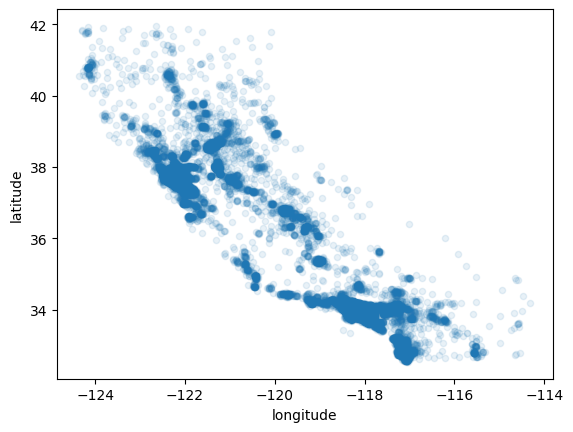

In [22]:
#now setting alpha for more visualization
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#alpha =0.1 show where denisty is more 
#less alpha show more details, high density area

"\n    here 's' control size of each circle smaller mean less bigger means high population \n    colormap convert data into color and jet convert its denisty according to color lowe \n    is blue highly is red\n    here choosing color for median_house_value features\n"

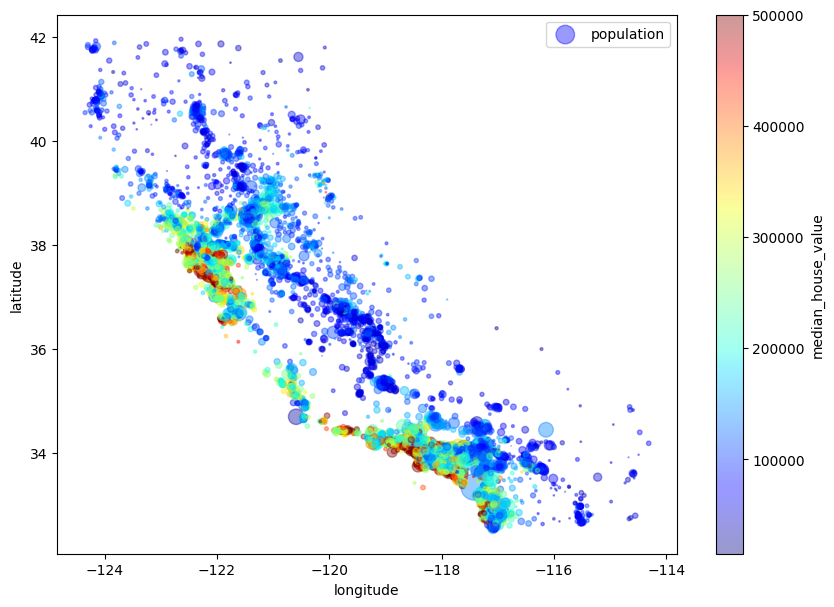

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s = housing["population"]/100, label = "population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend
"""
    here 's' control size of each circle smaller mean less bigger means high population 
    colormap convert data into color and jet convert its denisty according to color lowe 
    is blue highly is red
    here choosing color for median_house_value features
"""

In [24]:

corr_matrix = housing.select_dtypes(include="number").corr()
#this will only include numbers 

In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [26]:
"""
in correlation matrix relation are as follows
+1 = perfect positive realtion dependent and 0.0-1.0 range
0 = no correlation means no relation
-1 = perfect negative realtion mean inversely
"""

'\nin correlation matrix relation are as follows\n+1 = perfect positive realtion dependent and 0.0-1.0 range\n0 = no correlation means no relation\n-1 = perfect negative realtion mean inversely\n'

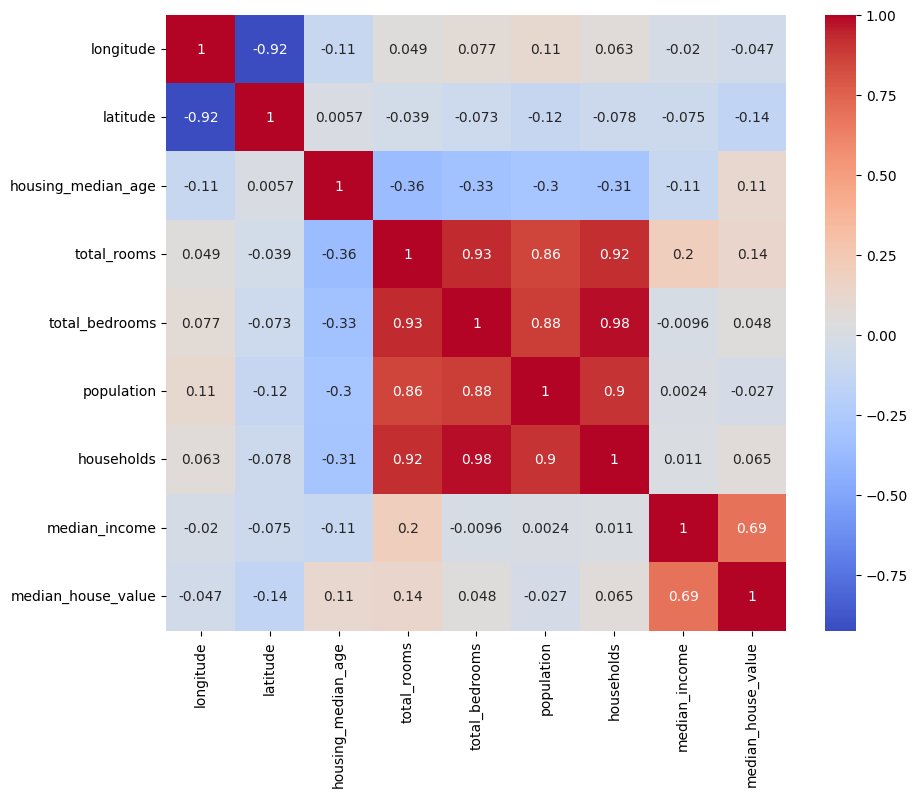

In [27]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot= True, cmap="coolwarm")
plt.show()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

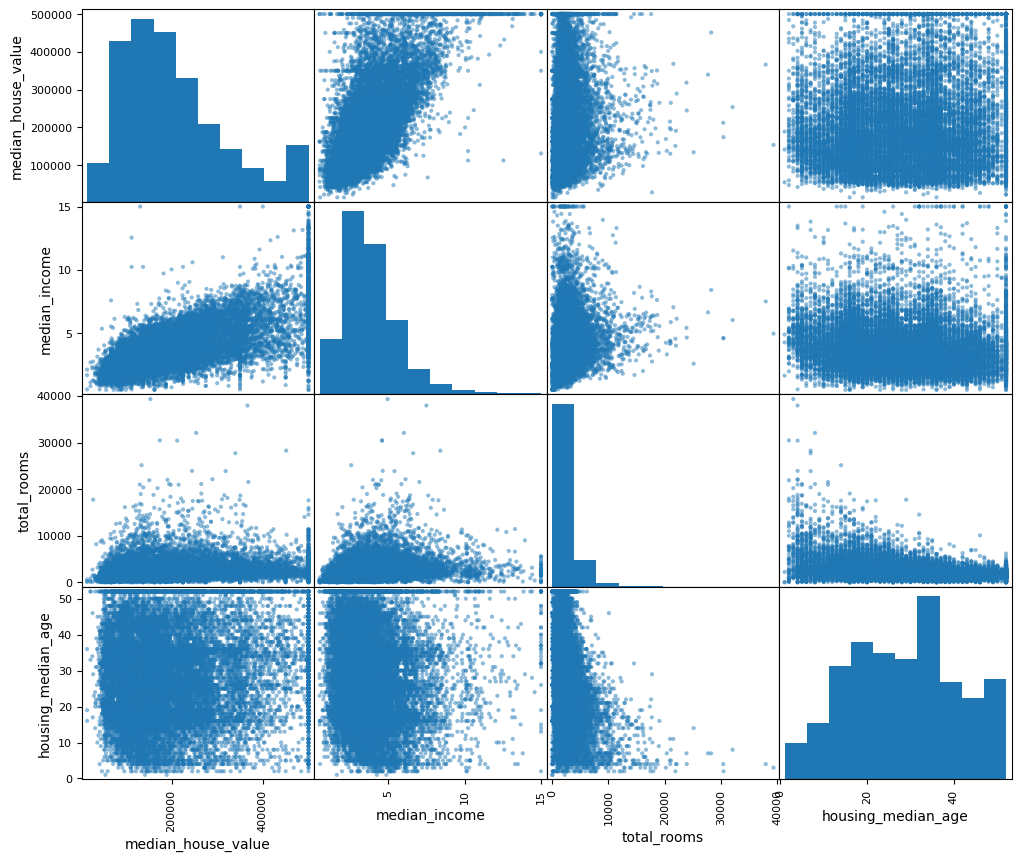

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,10))

<Axes: xlabel='median_income', ylabel='median_house_value'>

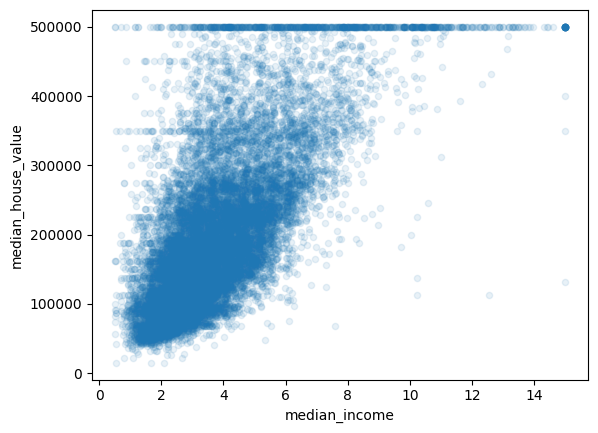

In [29]:
#to find relation between any two 
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [30]:
#now we try to make some more freatures combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["populaion_per_household"] = housing["population"]/housing["households"]


In [31]:
corr_matrix = housing.select_dtypes(include="number").corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687151
rooms_per_household        0.146255
total_rooms                0.135140
housing_median_age         0.114146
households                 0.064590
total_bedrooms             0.047781
populaion_per_household   -0.021991
population                -0.026882
longitude                 -0.047466
latitude                  -0.142673
bedrooms_per_room         -0.259952
Name: median_house_value, dtype: float64

In [32]:
# Here as we see, number of rooms per household is more accurate than total numbers of
#room in your house. So this show that the feature engineering or changing the attributes
#really help and give more accurate information about the data.

<h3>Prepare the Data for machine learning algorithms </h3>

In [34]:
#now time to prepare data for ml algorithm 
#for that we need to write function maunally

#we are actually we are doing that we are creating our own toolkit like we are creating
#Own pre defined functions functions so whenever we need, we can simply call them


In [35]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
housing_labels.info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 12655 to 19773
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


<h4>SimpleIMputer</h4>
this is used to handle the NaN values 
 1. mean
 2. median
 

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median") # here nan values fill using median 
#it only works with number value, so we only use numbers
housing_num = housing.drop("ocean_proximity", axis=1)


In [39]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [40]:
housing.isnull().sum()#hwich has missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

In [41]:
#now impute store result in statistics_instance variable
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [42]:
#now use this imputer values in repalce of missing values
x = imputer.transform(housing_num)
print(x)

[[-121.46     38.52     29.     ...  706.        2.1736    2.    ]
 [-117.23     33.09      7.     ...  768.        6.3373    5.    ]
 [-119.04     35.37     44.     ...  300.        2.875     2.    ]
 ...
 [-122.72     38.44     48.     ...  172.        3.1797    3.    ]
 [-122.7      38.31     14.     ...  501.        4.1964    3.    ]
 [-122.14     39.97     27.     ...  197.        3.1319    3.    ]]


<b>Flow of ML </b>
data -> process -> Model -> Prediction
<br>
<h4>Estimators</h4>
1. object that learn from data
we use $fit()$ method for that

<h4>Hyperparameters vs learned parameters </h4>
1. Hyperparameters -> set by users
SimpleImputer(strategy = "median")  
<br>
here medain is Hyperparameters
<br>
2. Learned Parameters -> learn from data
imputer.statistics_
<br>
this learn from data
	Hyperparameters → no underscore
	Learned parameters → underscore_
<br>
<h4>Transformers</h4>
objects that modify data
<br>
-> transform()
<br>
example :- imputer.transform(data)   this scale data
<br>
fit_transform instead of fit() and transform()
<br>
<h4>Prediction</h4>
Objects make predictions
<br>
prediction()
<br>
<h3>Full ML workflow </h3>
<b>step -1 </b>: Fit Transformer
<br>
scaler.fit(x)
<br>
<b>step-2</b>: Transform data
<br>
`X_scaled = scaler.tranform(x)`
<br>
<b>step-3</b>:Fit model
<br>
`model .fit(X_scaled, y)`
<br>
<b>Step-4</b>:Predict
<br>
model.predict(new_Data)


<h4>Handling Missing </h4>

In [104]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [106]:
#now we have to convert text to numerical data "OrdinalEncoder"
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder() #defining instances
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:15]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [108]:
ordinal_encoder.categories_ #show the categories that converted from text to numbers


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

 Here, one problem come when text data converted to the numeric than difficult for learning to
 <br>
 Which is closer and which is far for example,1 n 0 is closer than 1 and 4
 This create a false assumptions that 1 and 0 is closer in reality, 1 and  is something else
Here 0 is 1H ocean.
<br>
1 is Inland, so there is no relation between that okay so
We use one hot encoding to counter this prevent form false realtionship
<br>
`One - Hot encoding`
What happened actually here is, as previously we saw. There is a false relationship creating between the numbers when we convert text data to the numerical data so convert all that things into binary columns where they separate whether that feature or attribute is present or not like there is a list of data that red blue green colour so if in that column red is present, the red one will get 1 and rest blue and green will get zero. Similarly that in another columns, if that is blue present, so the red 0 blue 1 and green, 0 this is basically we are converting 1 or 0 giving models to a way to understand that it is present or not in that rather than giving in text form or in something confusing way




In [117]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [125]:
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [127]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]